In [14]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#hyperparameters
input_size = 784
hidden_size= 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

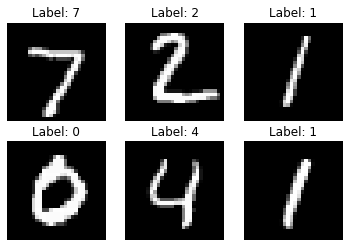

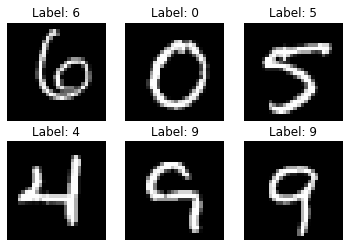

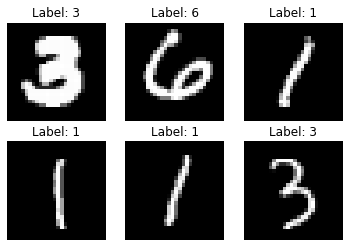

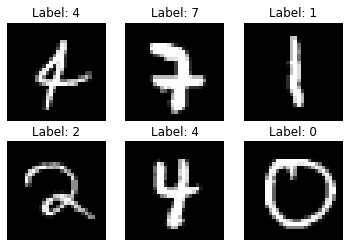

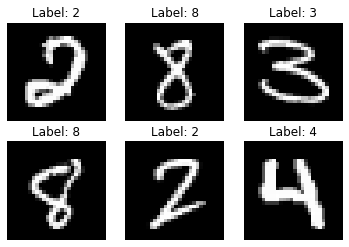

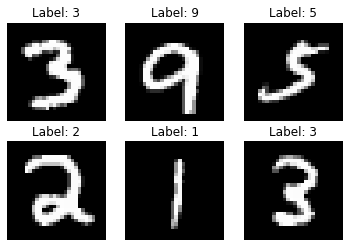

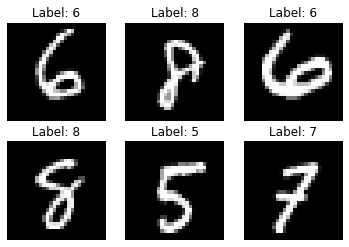

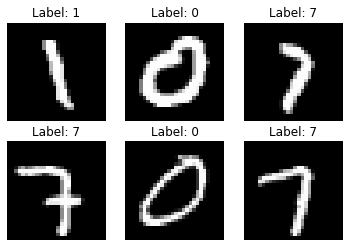

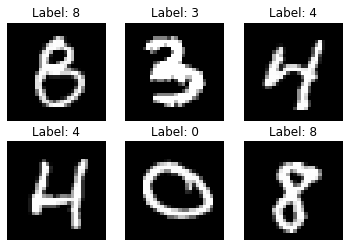

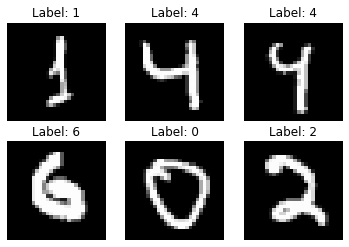

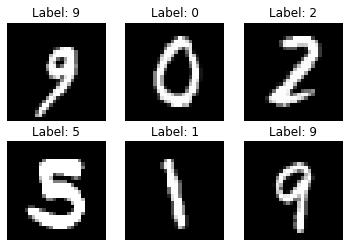

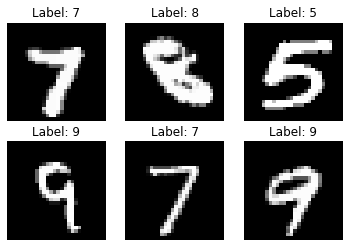

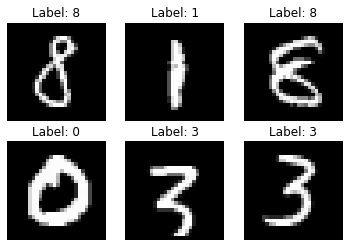

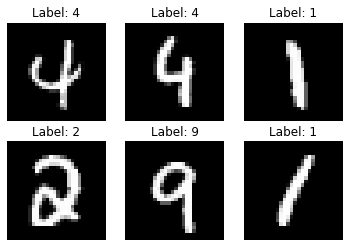

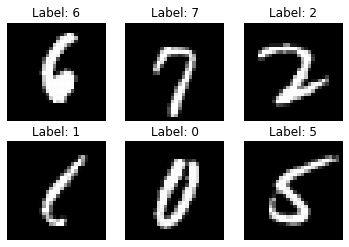

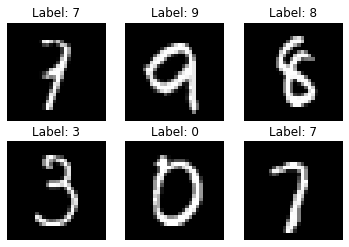

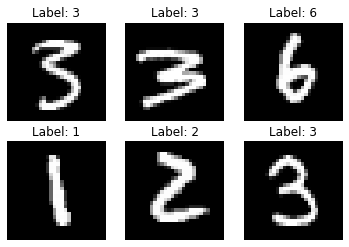

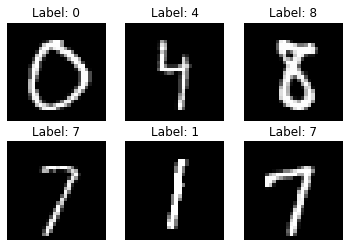

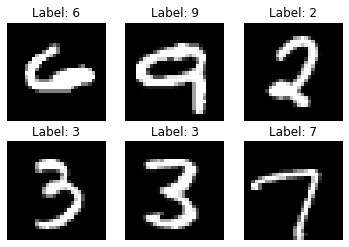

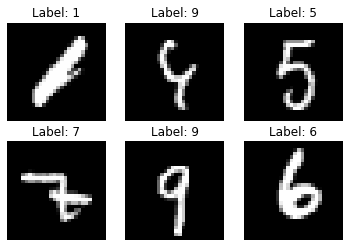

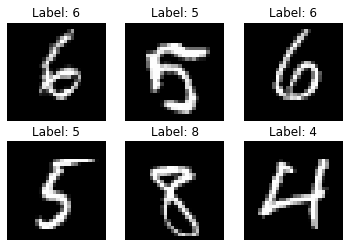

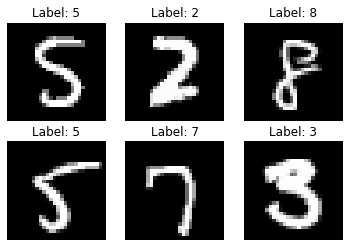

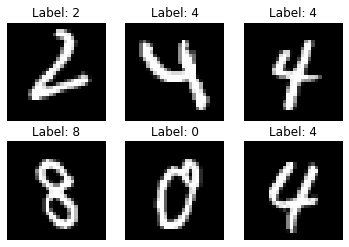

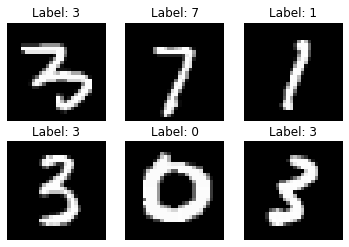

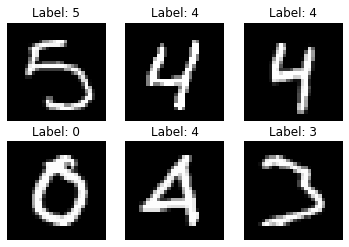

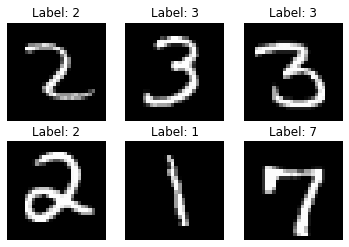

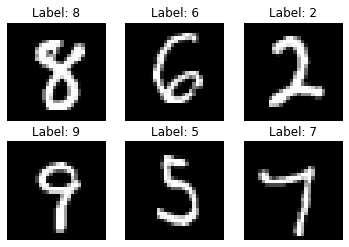

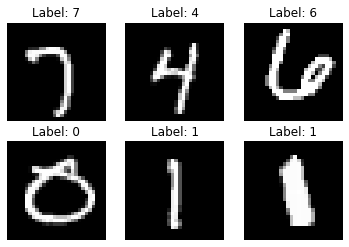

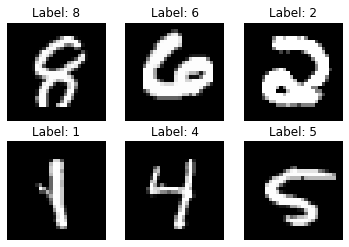

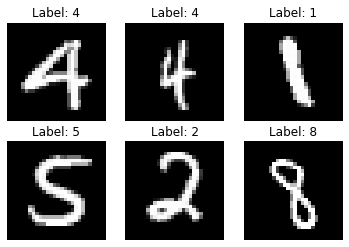

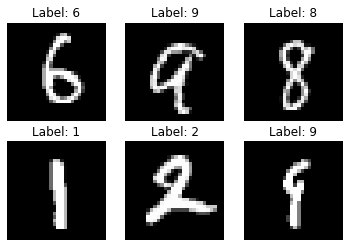

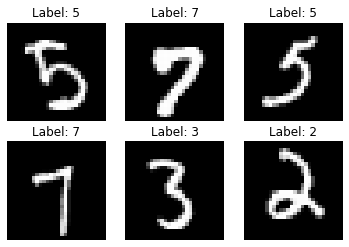

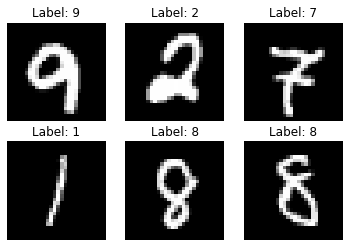

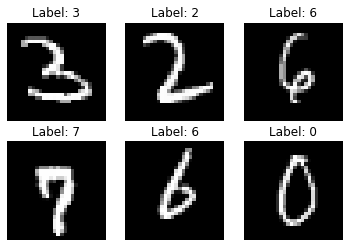

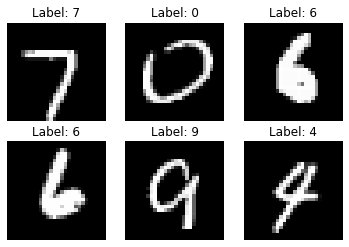

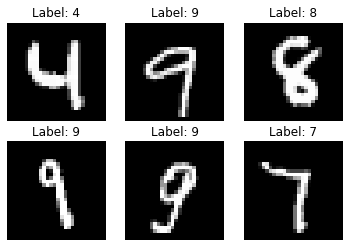

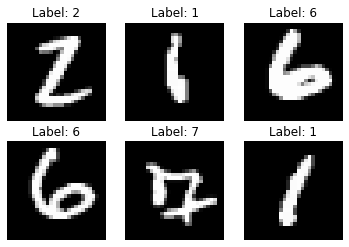

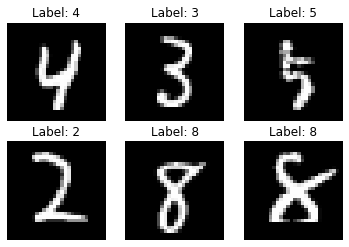

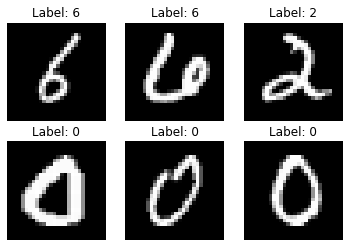

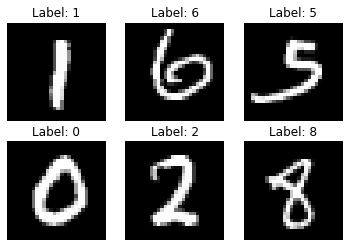

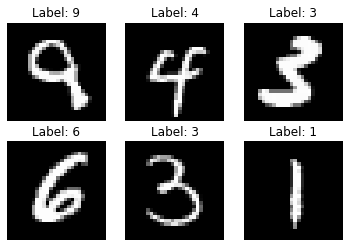

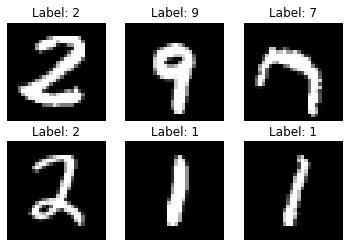

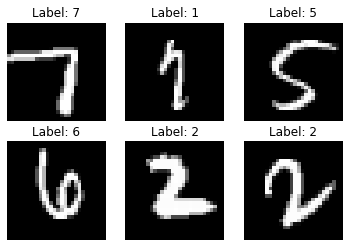

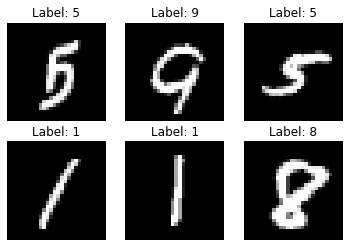

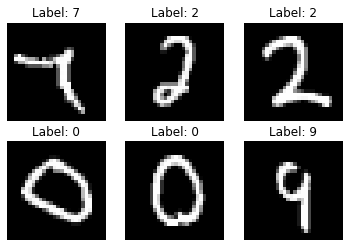

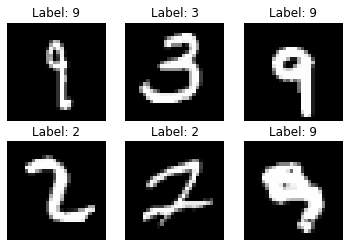

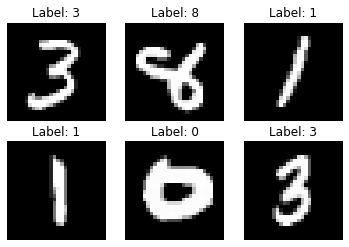

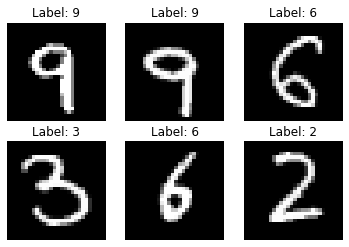

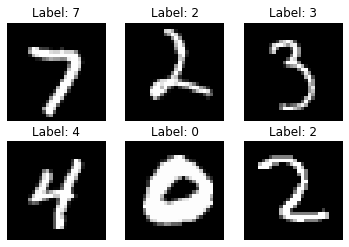

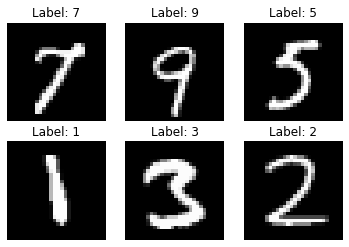

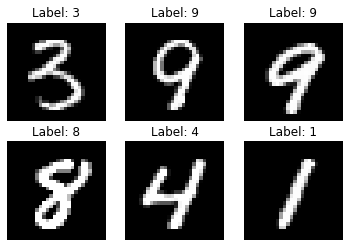

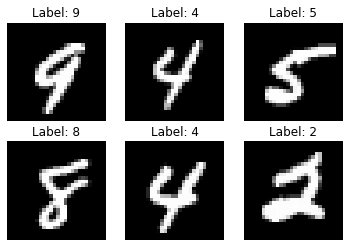

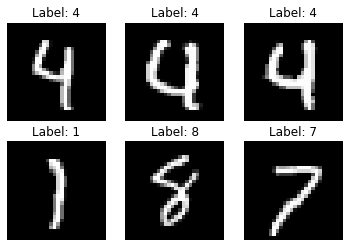

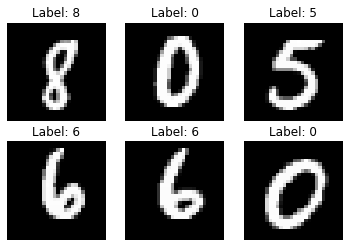

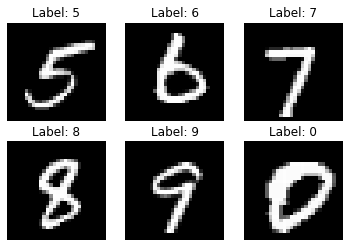

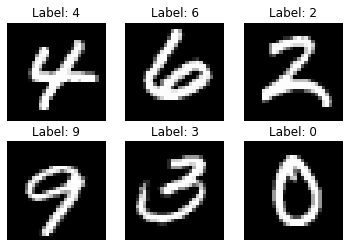

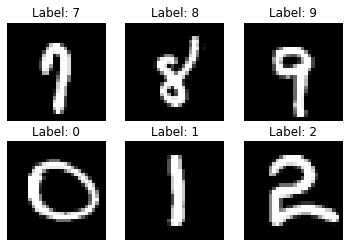

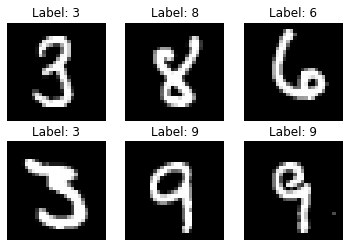

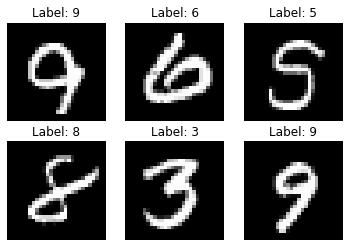

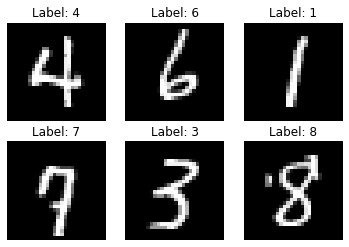

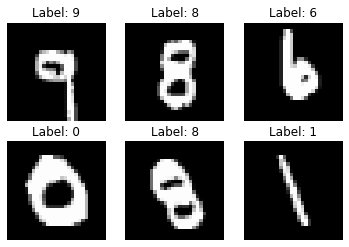

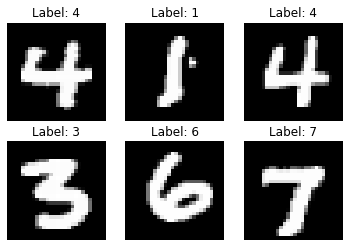

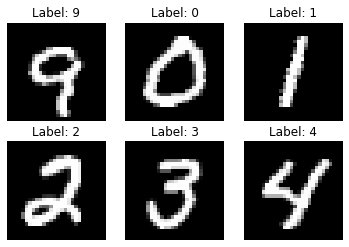

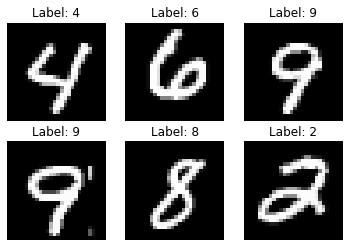

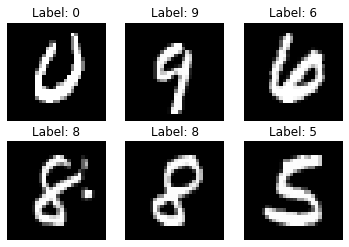

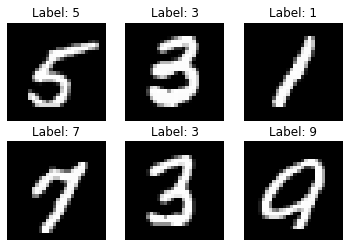

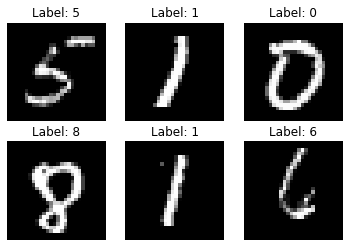

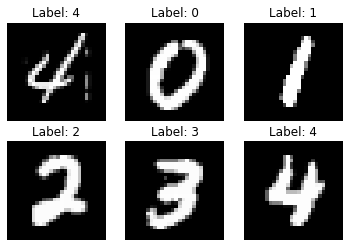

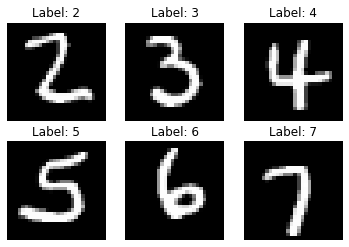

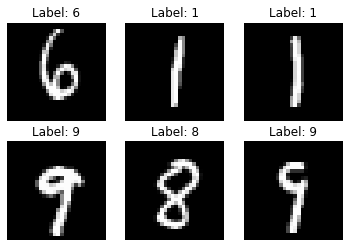

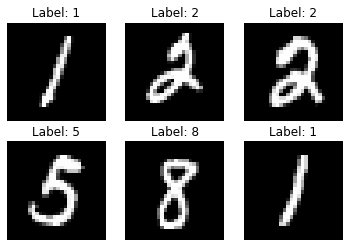

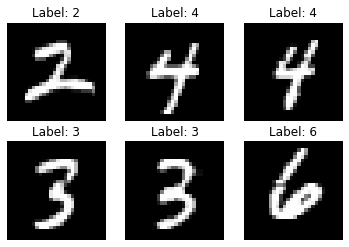

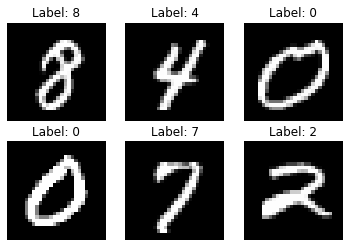

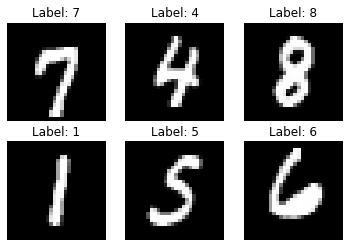

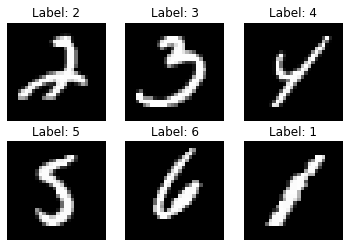

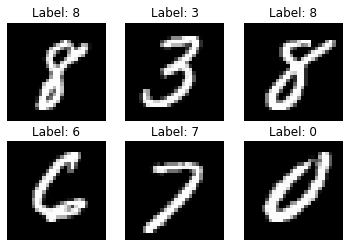

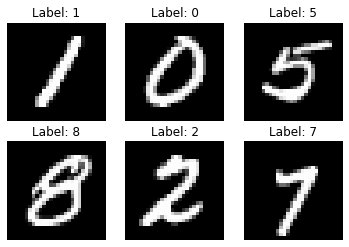

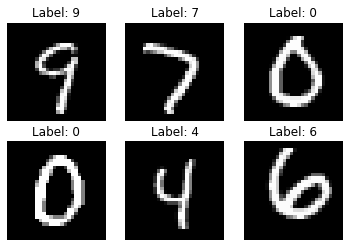

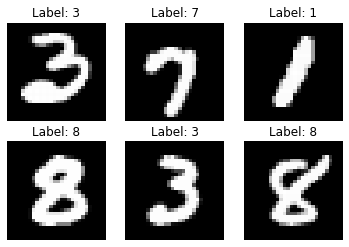

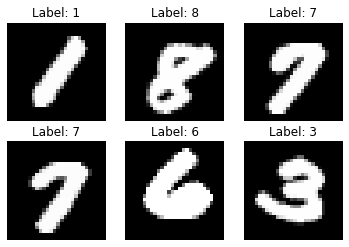

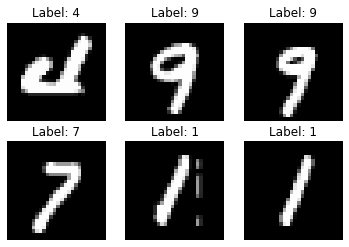

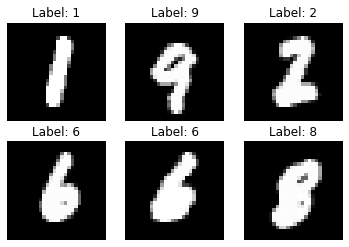

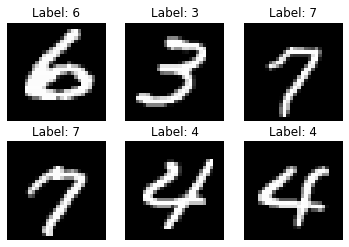

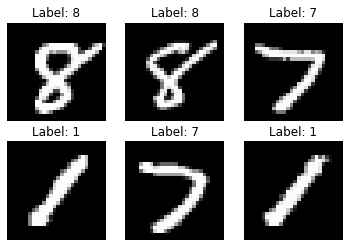

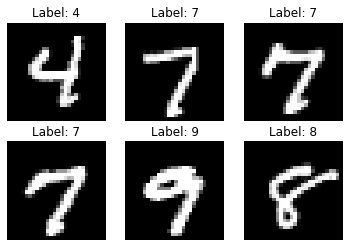

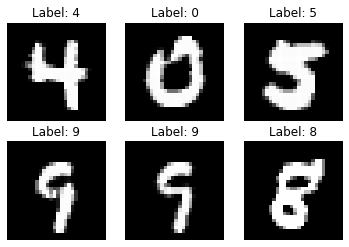

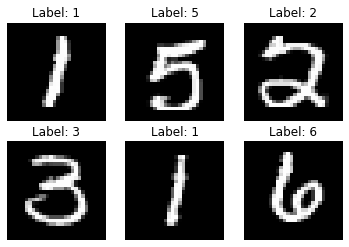

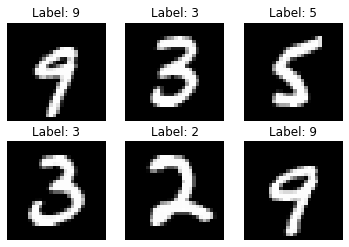

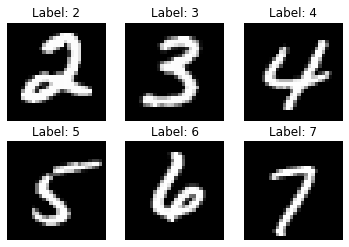

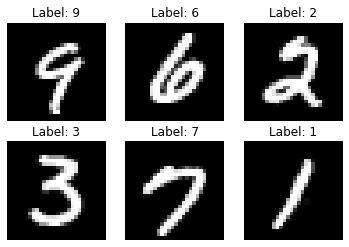

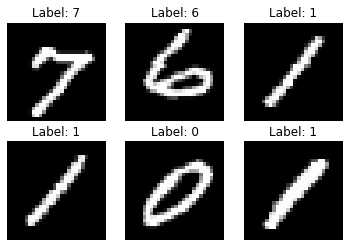

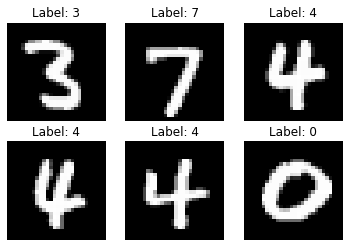

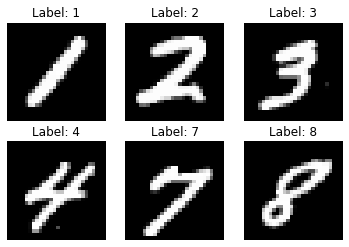

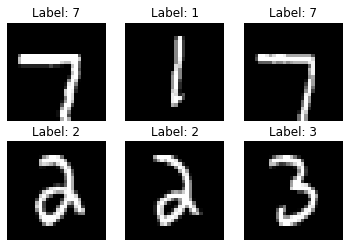

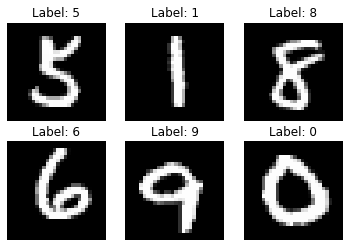

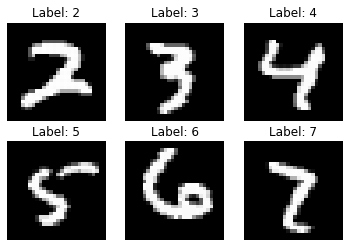

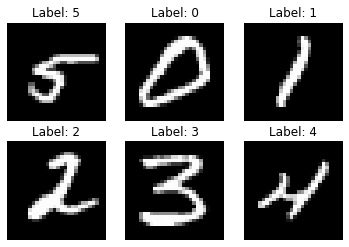

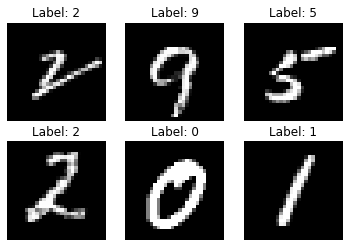

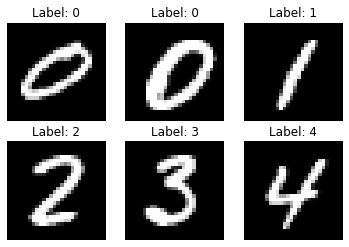

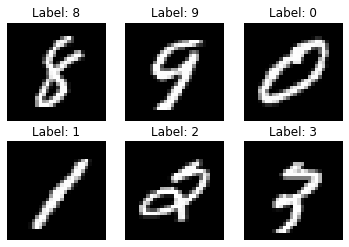

In [22]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

for data, targets in test_loader:
    example_data = data[:6]  # Take the first 6 images from the test dataset
    example_targets = targets[:6]

    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(example_data[i][0], cmap='gray')
        plt.title("Label: {}".format(example_targets[i].item()))
        plt.axis('off')
    plt.show()

In [28]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size,num_classes)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size,hidden_size,num_classes)

#loss and optimizers
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        #forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%10 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            
            
#testing and evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images,labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _,predictions = torch.max(outputs,1)
        n_samples+=labels.shape[0]
        n_correct += (predictions==labels).sum()
        
    acc = 100*n_correct/n_samples
    print(f"accuracy = {acc}")

Epoch [1/2], Step [10/600], Loss: 1.5050
Epoch [1/2], Step [20/600], Loss: 0.8364
Epoch [1/2], Step [30/600], Loss: 0.5698
Epoch [1/2], Step [40/600], Loss: 0.3187
Epoch [1/2], Step [50/600], Loss: 0.4412
Epoch [1/2], Step [60/600], Loss: 0.4895
Epoch [1/2], Step [70/600], Loss: 0.2946
Epoch [1/2], Step [80/600], Loss: 0.2950
Epoch [1/2], Step [90/600], Loss: 0.3910
Epoch [1/2], Step [100/600], Loss: 0.3654
Epoch [1/2], Step [110/600], Loss: 0.2560
Epoch [1/2], Step [120/600], Loss: 0.3608
Epoch [1/2], Step [130/600], Loss: 0.4105
Epoch [1/2], Step [140/600], Loss: 0.2196
Epoch [1/2], Step [150/600], Loss: 0.2236
Epoch [1/2], Step [160/600], Loss: 0.2956
Epoch [1/2], Step [170/600], Loss: 0.2148
Epoch [1/2], Step [180/600], Loss: 0.1743
Epoch [1/2], Step [190/600], Loss: 0.4104
Epoch [1/2], Step [200/600], Loss: 0.1982
Epoch [1/2], Step [210/600], Loss: 0.3964
Epoch [1/2], Step [220/600], Loss: 0.2403
Epoch [1/2], Step [230/600], Loss: 0.2477
Epoch [1/2], Step [240/600], Loss: 0.3572
E

1